# Looking at Magnitude and Phase in the STFT
In this part of the assignment we will modify time and pitch independently using the stft, which is historically often refered to as a "phase vocoder" in audio processing.

In [25]:
from a3py import *
import scipy as sp

### Let's grab some audio...


Input Audio File ./noisyhellocs6682.wav:


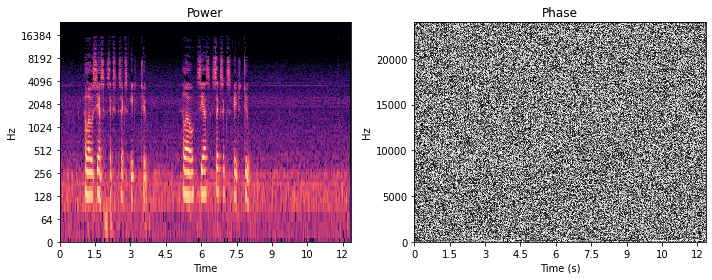

In [26]:
audio_file_path = './noisyhellocs6682.wav';
a = Audio(audio_file_path);
print("Input Audio File {}:".format(audio_file_path));
a.play()
stft = STFT.FromAudio(a);
stft.show()

## Which is more important: Phase or Magnitude?
Here we will do an experiment where we compare what happens when we randomize the phases of an stft and take its istft to what happens if we randomize the magnitudes.

**Make `rand_mag_stft` and `rand_phase_stft` in the code below use random magnitudes and phases, respectively.**

In [27]:
def rand_mag_stft(temp):
    return random.randint(1, 16384);
    
def rand_phase_stft():
    return random.randint(1, 20000);


In [36]:

def compareRandPhaseMag(audio, window_size, hop_size):
    # Delete or comment out this line
#     raise NotImplementedError
    #####    
    
    stft = STFT.FromAudio(audio, window_size=window_size, hop_size=hop_size);

    mag = stft.mag;
    phase = stft.phase;
    
    
    rand_mag = random.randint(1, 16384); # replace this with random values
    rand_phase = random.randint(1, 20000); # replace this with random values    
    
    # get a copy of the stft with the random magnitudes
    rand_mag_stft = stft.GetPhaseMagCopy(phase=phase, mag=rand_mag);

    # get a copy of the stft with the random phases
    rand_phase_stft = stft.GetPhaseMagCopy(phase=rand_phase, mag=mag);
    
    
    # display the original
    print("Unmodified ISTFT:")
    stft.GetISTFTAudio().play();
    stft.show("Unmodified");
    
    # display the random magnitude
    print("Original Phases, Random Magnitudes ISTFT:")
    rand_mag_stft.GetISTFTAudio().play();
    rand_mag_stft.show("Original Phases, Random Magnitudes | Window: {} | Hop: {}".format(window_size, hop_size));
    
    # display the random phase
    print("Original Magnitudes, Random Phases ISTFT:")
    rand_phase_stft.GetISTFTAudio().play();
    rand_phase_stft.show("Original Magnitudes, Random Phases | Window: {} | Hop: {}".format(window_size, hop_size));

### Let's see what happens when we use a relatively small window size and hop size...

In [ ]:
window_size=1024;
hop_size = 500;
compareRandPhaseMag(a, window_size=window_size, hop_size=hop_size)

### How about a much larger window size and hop size?

In [ ]:
# window_size=32768;
# hop_size = 8192;
window_size=1024;
hop_size = 518;
# 1024
# 128
compareRandPhaseMag(a, window_size=window_size, hop_size=hop_size)

### Feel free to try others as well...

## So, which is more important in the short time domain? Phase or Magnitude? How does this depend on window size and hop size? Why might window size and hop size matter? 
Write your answer below in this markdown cell... you don't need to write more than a few sentences for each.

**How do smaller/larger window and hop sizes affect the importance of phase and magnitude?:**
**Hint: Remember our discussion of randomizing phase vs magnitude in the non-short time Fourier domain. What hop size and window size does this correspond to?**

I think that magnitude is more important than phase, since with phase intact and random magnitude the result is incomprehensible noise, while random phase and intact magnitude is off but understandable. 

A larger window and hop size seems to create a lower pitch result, likely because I don't change the parameters for random generation based on window size, so the results are on the lower end of the spectrum.
